In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


In [2]:
df = pd.read_csv("/kaggle/input/sample-sales-data/sales_data_sample.csv", encoding="latin1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df['ADDRESSLINE2'].fillna('Missing', inplace=True)
df['STATE'].fillna('Missing', inplace=True)
df['TERRITORY'].fillna('Missing', inplace=True)
df['POSTALCODE'].fillna('Missing', inplace=True)

/tmp/ipykernel_13/1309048852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ADDRESSLINE2'].fillna('Missing', inplace=True)
/tmp/ipykernel_13/1309048852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [5]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [7]:
print("QUANTITYORDERED Stats: ")
print(df['QUANTITYORDERED'].describe())
print("\nPRICEEACH Stats:")
print(df['PRICEEACH'].describe())

QUANTITYORDERED Stats: 
count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

PRICEEACH Stats:
count    2823.000000
mean       83.658544
std        20.174277
min        26.880000
25%        68.860000
50%        95.700000
75%       100.000000
max       100.000000
Name: PRICEEACH, dtype: float64


In [8]:
df['Order_Year'] = df['ORDERDATE'].dt.year
df['Order_Month'] = df['ORDERDATE'].dt.month
df['Order_DayOfWeek'] = df['ORDERDATE'].dt.day_name()

In [9]:
snapshot_date = df['ORDERDATE'].max() + pd.Timedelta(days=1)

In [10]:
rfm_df = df.groupby('CUSTOMERNAME').agg(
    Recency=('ORDERDATE', lambda x: (snapshot_date - x.max()).days),
    
    Frequency=('ORDERNUMBER', 'nunique'),
   
    Monetary=('SALES', 'sum')
)

print(rfm_df.head())

                         Recency  Frequency   Monetary
CUSTOMERNAME                                          
AV Stores, Co.               196          3  157807.81
Alpha Cognac                  65          3   70488.44
Amica Models & Co.           265          2   94117.26
Anna's Decorations, Ltd       84          4  153996.13
Atelier graphique            188          3   24179.96


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
rfm_features = rfm_df[['Recency','Frequency','Monetary']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm_features.index, columns=rfm_features.columns)
print(rfm_scaled_df.head())

                          Recency  Frequency  Monetary
CUSTOMERNAME                                          
AV Stores, Co.           0.100792  -0.115831  0.444432
Alpha Cognac            -0.901470  -0.115831 -0.351497
Amica Models & Co.       0.628701  -0.459586 -0.136117
Anna's Decorations, Ltd -0.756104   0.227925  0.409688
Atelier graphique        0.039585  -0.115831 -0.773606


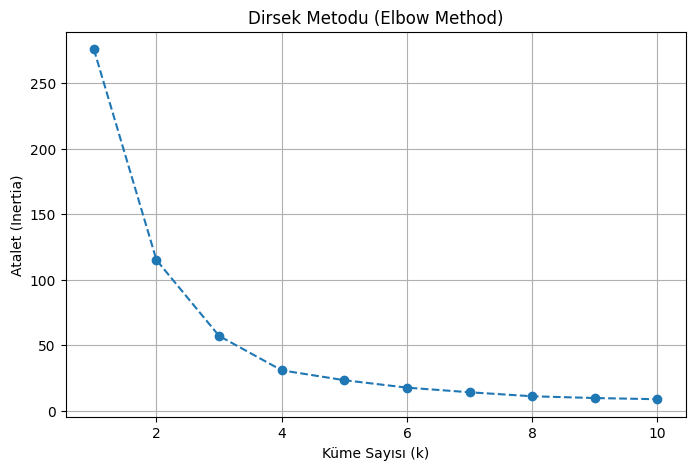

In [13]:
from sklearn.cluster import KMeans 
inertia = []
K_RANGE = range(1, 11)

for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_df)
    
   
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_RANGE, inertia, marker='o', linestyle='--')
plt.title('Dirsek Metodu (Elbow Method)')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Atalet (Inertia)')
plt.grid(True)
plt.show()

In [14]:
OPTIMAL_K = 4
kmeans_final = KMeans(n_clusters= OPTIMAL_K, random_state=42, n_init=10)
kmeans_final.fit(rfm_scaled_df)

rfm_df['Cluster'] = kmeans_final.labels_
print(rfm_df.head())

                         Recency  Frequency   Monetary  Cluster
CUSTOMERNAME                                                   
AV Stores, Co.               196          3  157807.81        2
Alpha Cognac                  65          3   70488.44        0
Amica Models & Co.           265          2   94117.26        2
Anna's Decorations, Ltd       84          4  153996.13        0
Atelier graphique            188          3   24179.96        2


In [15]:
cluster_profile = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print('Cluster Mean (Profile): ')
print(cluster_profile)

Cluster Mean (Profile): 
            Recency  Frequency       Monetary
Cluster                                      
0         51.965517   3.517241  114589.796897
1          2.000000  21.500000  783576.085000
2        202.428571   2.795918   88955.988571
3        449.166667   2.083333   65294.094167


In [16]:
segment_map = {
    1: 'Champions',  
    0: 'Loyal',         
    2: 'At Risk',         
    3: 'Lost',            
}

rfm_df['Segment'] = rfm_df['Cluster'].replace(segment_map)
rfm_df.drop('Cluster', axis=1, inplace=True)


print(rfm_df.head())

print("\nNumber of Customers in Each Segment:")
print(rfm_df['Segment'].value_counts())

                         Recency  Frequency   Monetary  Segment
CUSTOMERNAME                                                   
AV Stores, Co.               196          3  157807.81  At Risk
Alpha Cognac                  65          3   70488.44    Loyal
Amica Models & Co.           265          2   94117.26  At Risk
Anna's Decorations, Ltd       84          4  153996.13    Loyal
Atelier graphique            188          3   24179.96  At Risk

Number of Customers in Each Segment:
Segment
At Risk      49
Loyal        29
Lost         12
Champions     2
Name: count, dtype: int64


In [17]:
rfm_df.to_csv('musteri_segmentleri.csv')
df.to_csv('temiz_satis_verisi.csv', index=False)